# Bureau of Statistics (BLS)

In [46]:
import requests
import json
import time

# import time
import os

# import numpy as np
# from scipy.stats import linregress

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Currently no catalogue of IDs. Take a look at this page to get the series IDs:
https://www.bls.gov/help/hlpforma.htm

For [CUUR0000SA0L1E](https://www.bls.gov/help/hlpforma.htm#CU), see [Item](https://download.bls.gov/pub/time.series/cu/cu.item) and [Area](https://download.bls.gov/pub/time.series/cu/cu.area) codes. For more details on other attributes of data, e.g., "Seasional Adjustment", follow the links for descriptions. 

Base Year:
> Indicates the designated reference date from which price change is measured, where the "current" base year is 1982-84=100 or more recent (S) and the "alternate" base year (A) is prior to the current base year.


In [ ]:
headers = {
    "Content-type": "application/json"}

series_id_dict = {
    # "All":                        "CU" + "U"+ "R" + "0000" + "SA0",
    # "Shelter":                    "CU" + "U"+ "R" + "0000" + "SAH1",
    # "Housing":                    "CU" + "U"+ "R" + "0000" + "SAH",
    "Food":                       "CU" + "U"+ "R" + "0000" + "SAF1",
    # "Education":                  "CU" + "U"+ "R" + "0000" + "SAE1",
    "Health_Insurance":           "CU" + "U"+ "R" + "0000" + "SEME",
    #
    # "All_NYC_Metro":              "CU" + "U"+ "R" + "S12A" + "SA0",
    # "Shelter_NYC_Metro":          "CU" + "U"+ "R" + "S12A" + "SAH1",
    # "Housing_NYC_Metro":          "CU" + "U"+ "R" + "S12A" + "SAH",
    "Food_NYC_Metro":             "CU" + "U"+ "R" + "S12A" + "SAF1",
    # "Education_NYC_Metro":        "CU" + "U"+ "R" + "S12A" + "SAE1",
    "Health_Insurance_NYC_Metro": "CU" + "U"+ "R" + "S12A" + "SEME",
    #
    # "All_LA_Metro":               "CU" + "U"+ "R" + "A421" + "SA0",
    # "Shelter_LA_Metro":           "CU" + "U"+ "R" + "A421" + "SAH1",
    # "Housing_LA_Metro":           "CU" + "U"+ "R" + "A421" + "SAH",
    "Food_LA_Metro":              "CU" + "U"+ "R" + "A421" + "SAF1",
    # "Education_LA_Metro":         "CU" + "U"+ "R" + "A421" + "SAE1",
    "Health_Insurance_LA_Metro":  "CU" + "U"+ "R" + "A421" + "SEME",
    #
    # "All_Seatle_Metro":              "CU" + "U"+ "R" + "S49D" + "SA0",
    # "Shelter_Seatle_Metro":          "CU" + "U"+ "R" + "S49D" + "SAH1",
    # "Housing_Seatle_Metro":          "CU" + "U"+ "R" + "S49D" + "SAH",
    "Food_Seatle_Metro":             "CU" + "U"+ "R" + "S49D" + "SAF1",
    # "Education_Seatle_Metro":        "CU" + "U"+ "R" + "S49D" + "SAE1",
    "Health_Insurance_Seatle_Metro": "CU" + "U"+ "R" + "S49D" + "SEME",
    #
    # "All_SF_Metro":               "CU" + "U"+ "R" + "S49B" + "SA0",
    # "Shelter_SF_Metro":           "CU" + "U"+ "R" + "S49B" + "SAH1",
    # "Housing_SF_Metro":           "CU" + "U"+ "R" + "S49B" + "SAH",
    "Food_SF_Metro":              "CU" + "U"+ "R" + "S49B" + "SAF1",
    # "Education_SF_Metro":         "CU" + "U"+ "R" + "S49B" + "SAE1",
    "Health_Insurance_SF_Metro":  "CU" + "U"+ "R" + "S49B" + "SEME",
    #
    # "All_DC_Metro":               "CU" + "U"+ "R" + "S35A" + "SA0",
    # "Shelter_DC_Metro":           "CU" + "U"+ "R" + "S35A" + "SAH1",
    # "Housing_DC_Metro":           "CU" + "U"+ "R" + "S35A" + "SAH",
    "Food_DC_Metro":              "CU" + "U"+ "R" + "S35A" + "SAF1",
    # "Education_DC_Metro":         "CU" + "U"+ "R" + "S35A" + "SAE1",
    "Health_Insurance_DC_Metro":  "CU" + "U"+ "R" + "S35A" + "SEME",
    #
    # "All_Dallas_Metro":               "CU" + "U"+ "R" + "S37A" + "SA0",
    # "Shelter_Dallas_Metro":           "CU" + "U"+ "R" + "S37A" + "SAH1",
    # "Housing_Dallas_Metro":           "CU" + "U"+ "R" + "S37A" + "SAH",
    "Food_Dallas_Metro":              "CU" + "U"+ "R" + "S37A" + "SAF1",
    # "Education_Dallas_Metro":         "CU" + "U"+ "R" + "S37A" + "SAE1",
    "Health_Insurance_Dallas_Metro":  "CU" + "U"+ "R" + "S37A" + "SEME",
    #
    # "All_Boston_Metro":               "CU" + "U"+ "R" + "S11A" + "SA0",
    # "Shelter_Boston_Metro":           "CU" + "U"+ "R" + "S11A" + "SAH1",
    # "Housing_Boston_Metro":           "CU" + "U"+ "R" + "S11A" + "SAH",
    "Food_Boston_Metro":              "CU" + "U"+ "R" + "S11A" + "SAF1",
    # "Education_Boston_Metro":         "CU" + "U"+ "R" + "S11A" + "SAE1",
    "Health_Insurance_Boston_Metro":  "CU" + "U"+ "R" + "S11A" + "SEME",
    #
    # "All_Chicago_Metro":              "CU" + "U"+ "R" + "S23A" + "SA0",
    # "Shelter_Chicago_Metro":          "CU" + "U"+ "R" + "S23A" + "SAH1",
    # "Housing_Chicago_Metro":          "CU" + "U"+ "R" + "S23A" + "SAH",
    "Food_Chicago_Metro":             "CU" + "U"+ "R" + "S23A" + "SAF1",
    # "Education_Chicago_Metro":        "CU" + "U"+ "R" + "S23A" + "SAE1",
    "Health_Insurance_Chicago_Metro": "CU" + "U"+ "R" + "S23A" + "SEME",
    #
    # "All_Denver_Metro":              "CU" + "U"+ "R" + "S48B" + "SA0",
    # "Shelter_Denver_Metro":          "CU" + "U"+ "R" + "S48B" + "SAH1",
    # "Housing_Denver_Metro":          "CU" + "U"+ "R" + "S48B" + "SAH",
    "Food_Denver_Metro":             "CU" + "U"+ "R" + "S48B" + "SAF1",
    # "Education_Denver_Metro":        "CU" + "U"+ "R" + "S48B" + "SAE1",
    "Health_Insurance_Denver_Metro": "CU" + "U"+ "R" + "S48B" + "SEME",
    #
    # "All_Miami_Metro":              "CU" + "U"+ "R" + "S35B" + "SA0",
    # "Shelter_Miami_Metro":          "CU" + "U"+ "R" + "S35B" + "SAH1",
    # "Housing_Miami_Metro":          "CU" + "U"+ "R" + "S35B" + "SAH",
    "Food_Miami_Metro":             "CU" + "U"+ "R" + "S35B" + "SAF1",
    # "Education_Miami_Metro":        "CU" + "U"+ "R" + "S35B" + "SAE1",
    "Health_Insurance_Miami_Metro": "CU" + "U"+ "R" + "S35B" + "SEME",
}
print(f"Number of Series: {len(series_id_dict)}")

df_dict = {}
for series_name in series_id_dict.keys():
    df_dict[series_name] = pd.DataFrame(columns=["Year", "Month", "Value"])

In [ ]:
end_interval_year = 2024
interval_length = 10

while end_interval_year >= 1960: 
    data = json.dumps({
        "seriesid": list(series_id_dict.values()),
        "startyear": f"{end_interval_year - interval_length}", 
        "endyear": f"{end_interval_year}"})

    p = requests.post(
        "https://api.bls.gov/publicAPI/v2/timeseries/data/", 
        data=data, 
        headers=headers)

    json_data = json.loads(p.text)
    if json_data["status"] != "REQUEST_SUCCEEDED":
        display(json_data["status"])
        display(json.dumps(json_data, indent=4))
        break

    # Append to DataFrames:
    for idx, series_name in enumerate(series_id_dict.keys()):
        for data in json_data["Results"]["series"][idx]["data"]:
            year = int(data["year"])
            month = int(data["period"][1:])
            value = float(data["value"])
            df_dict[series_name].loc[len(df_dict[series_name].index)] = [year, month, value]
        
    display(f"Decade: {end_interval_year - interval_length} - {end_interval_year}")
    # display(df_dict["All"].tail(12).transpose())
    end_interval_year -= interval_length

    # time.sleep(30)

In [ ]:
for name, df in df_dict.items():
    df.to_csv(f"./csv_files/{name}.csv")

# Plot Results

In [12]:
df_dict = {}
for root, dirs, files in os.walk("./csv_files"):
    for file in files:
        if file.endswith(".csv"):
            series_name = file.split(".")[0]
            pathname = os.path.join(root, file)
            print(f"\t{series_name:>28}  ->  {pathname}")
            df_dict[series_name] = pd.read_csv(pathname, index_col=False)
            df_dict[series_name].dropna(inplace=True)
            # df_dict[series_name].drop_duplicates(inplace=True)
            # df_dict[series_name]["DATE"] = pd.to_datetime(
            #     df_dict[series_name]["DATE"], format="%Y-%m-%d")      
            date_list = [str(int(x[0])) + "-" + str(int(x[1])).zfill(2) \
                         for x in zip(df_dict[series_name]["Year"], df_dict[series_name]["Month"])]
            df_dict[series_name]["DATE"] = pd.to_datetime(date_list, format="%Y-%m")
            df_dict[series_name]["Day"] = (
                df_dict[series_name]["DATE"] - pd.Timestamp.today()).dt.days
            df_dict[series_name].sort_values(by="Day", ascending=True)
            df_dict[series_name].reset_index(inplace=True)

	              Food_NYC_Metro  ->  ./csv_files/Food_NYC_Metro.csv
	            All_Dallas_Metro  ->  ./csv_files/All_Dallas_Metro.csv
	   Health_Insurance_LA_Metro  ->  ./csv_files/Health_Insurance_LA_Metro.csv
	        Shelter_Seatle_Metro  ->  ./csv_files/Shelter_Seatle_Metro.csv
	       Shelter_Chicago_Metro  ->  ./csv_files/Shelter_Chicago_Metro.csv
	            All_Denver_Metro  ->  ./csv_files/All_Denver_Metro.csv
	               Food_SF_Metro  ->  ./csv_files/Food_SF_Metro.csv
	Health_Insurance_Seatle_Metro  ->  ./csv_files/Health_Insurance_Seatle_Metro.csv
	            Shelter_DC_Metro  ->  ./csv_files/Shelter_DC_Metro.csv
	        Shelter_Boston_Metro  ->  ./csv_files/Shelter_Boston_Metro.csv
	               Food_DC_Metro  ->  ./csv_files/Food_DC_Metro.csv
	          Food_Chicago_Metro  ->  ./csv_files/Food_Chicago_Metro.csv
	            Food_Miami_Metro  ->  ./csv_files/Food_Miami_Metro.csv
	                        Food  ->  ./csv_files/Food.csv
	           Food_Denver_Metro 

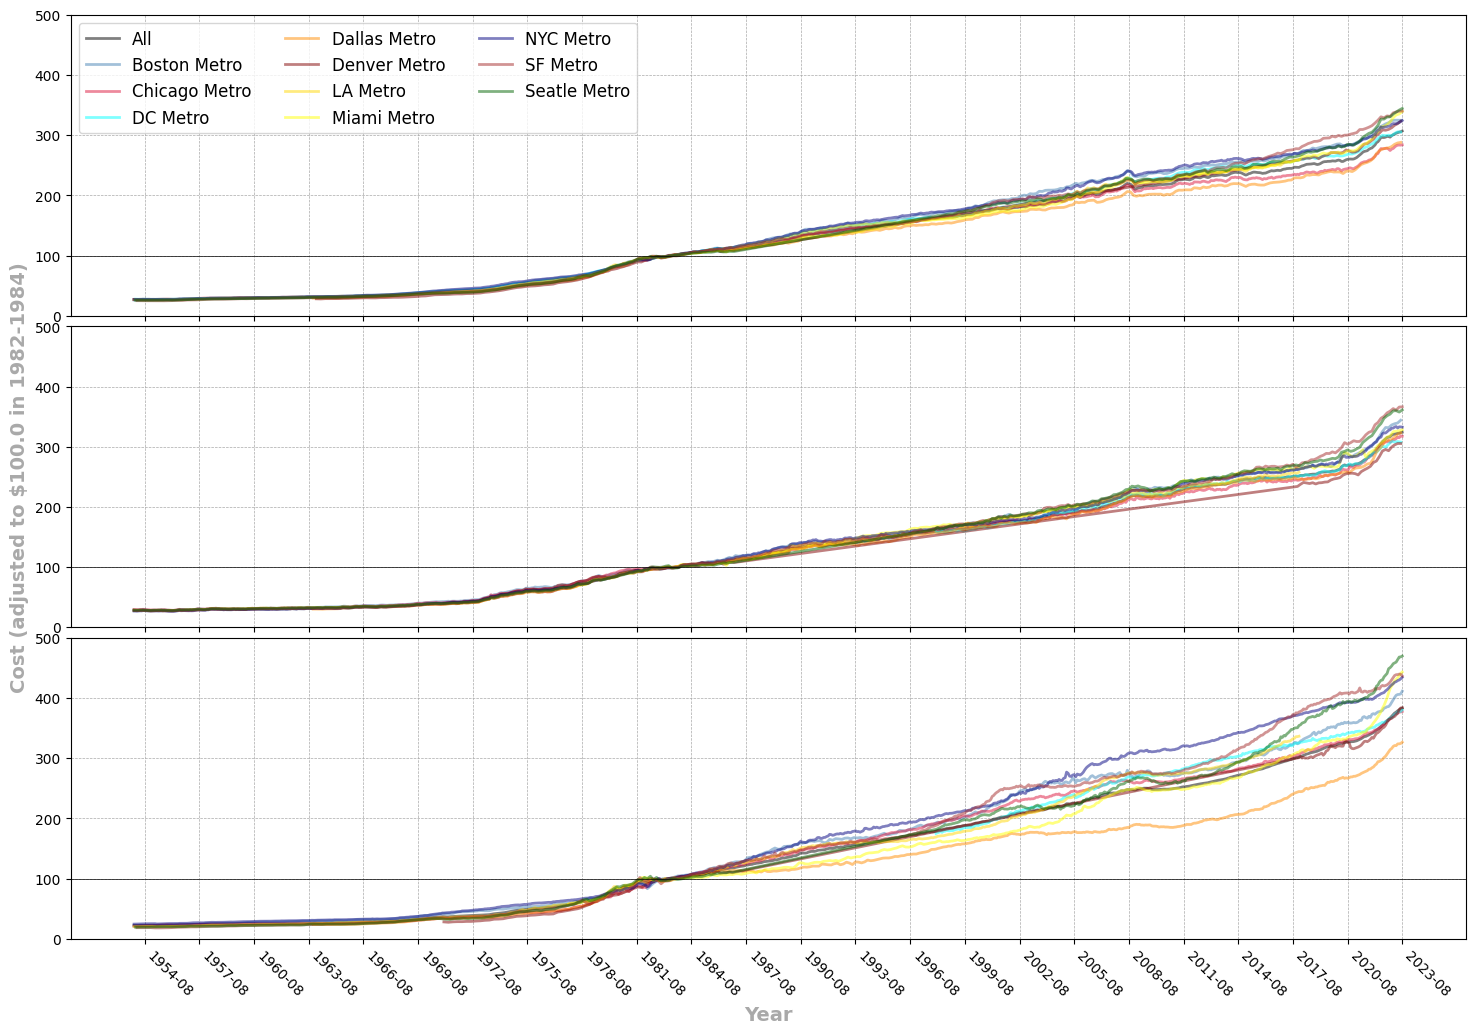

In [67]:
tick_freq = 36
num_plots = 3
figure_size = (18.0, 12.0)
colors_dict = {
  "National": "black",
  "NYC": "navy",
  "Boston": "steelblue",
  "DC": "cyan",
  "Chicago": "crimson",
  "Dallas": "darkorange",
  "Denver": "maroon",
  "Seatle": "darkgreen",
  "SF": "brown",
  "LA": "gold",
  "Miami": "yellow",
}

fig = plt.figure(figsize=figure_size)

gs = gridspec.GridSpec(num_plots, 1, figure=fig)
gs.update(wspace=0.02, hspace=0.035)
axes = [fig.add_subplot(gs[i, 0]) for i in range(num_plots)]

for name, df in sorted(df_dict.items()):
    color = colors_dict["National"]
    for metro_name, metro_color in colors_dict.items():
        if name.find(metro_name) != -1:
            color = metro_color
            
    # if name.find("_") != -1:
    #     continue

    if name.find("All") != -1:
        ls = "-"
        lw = 2.0
        marker = ""
        markersize = 7.5
        alpha = 0.5
        ax = axes[0]
    elif name.find("Food") != -1:
        ls = "-"
        lw = 2.0
        marker = ""
        markersize = 7.5
        alpha = 0.5
        ax = axes[1]
    elif name.find("Shelter") != -1:
        ls = "-"
        lw = 2.0
        marker = ""
        markersize = 7.5
        alpha = 0.5
        ax = axes[2]
    else:
        continue
    ax.plot(df["Day"].to_numpy(), df["Value"].to_numpy(),
            ls=ls, lw=lw, marker=marker, markersize=markersize,
            alpha=alpha, color=color,
            label=" ".join(name.split("_")[-2:]))
    # break

xtick_labels = df_dict["All"]["DATE"].dt.strftime("%Y-%m").iloc[::tick_freq].to_list()
x_ticks = df_dict["All"]["Day"].iloc[::tick_freq].to_list()
for idx, ax in enumerate(axes):
    if idx == 0:
        ax.legend(loc="upper left", ncol=3, fontsize=12)
    
    ax.grid(lw=0.5, ls="--", color="darkgrey")
    ax.axhline(y=100.0, linestyle="-", lw=0.5, color="black")
    ax.set_axisbelow("True")
    # ax.set_yscale("log")

    ax.set_xticks(x_ticks)
    ax.set_ylim(0, 500)
    if idx == len(axes) - 1:
        ax.set_xlabel("Year", fontsize=14, 
                      fontweight="bold", color="darkgrey")
        ax.set_xticklabels(xtick_labels, rotation=-45, ha="left", va="top", color="black", fontsize=10)
    else:
        ax.set_xticklabels([])
        
    if idx == num_plots // 2:
        ax.set_ylabel("Cost (adjusted to $100.0 in 1982-1984)", fontsize=14, 
                      fontweight="bold", color="darkgrey")

plt.show()

In [38]:
grouped_dict = {}
for name, df in sorted(df_dict.items()):
    if name.find("_") == -1:
        if "National" not in grouped_dict:
            grouped_dict["National"] = {}
        grouped_dict["National"][name] = name
        continue
    elif name.find("Metro") == -1:
        continue
    metro_name = "_".join(name.split("_")[-2:])
    item = name.split("_")[0]
    if metro_name not in grouped_dict:
        grouped_dict[metro_name] = {}
    grouped_dict[metro_name][item] = name

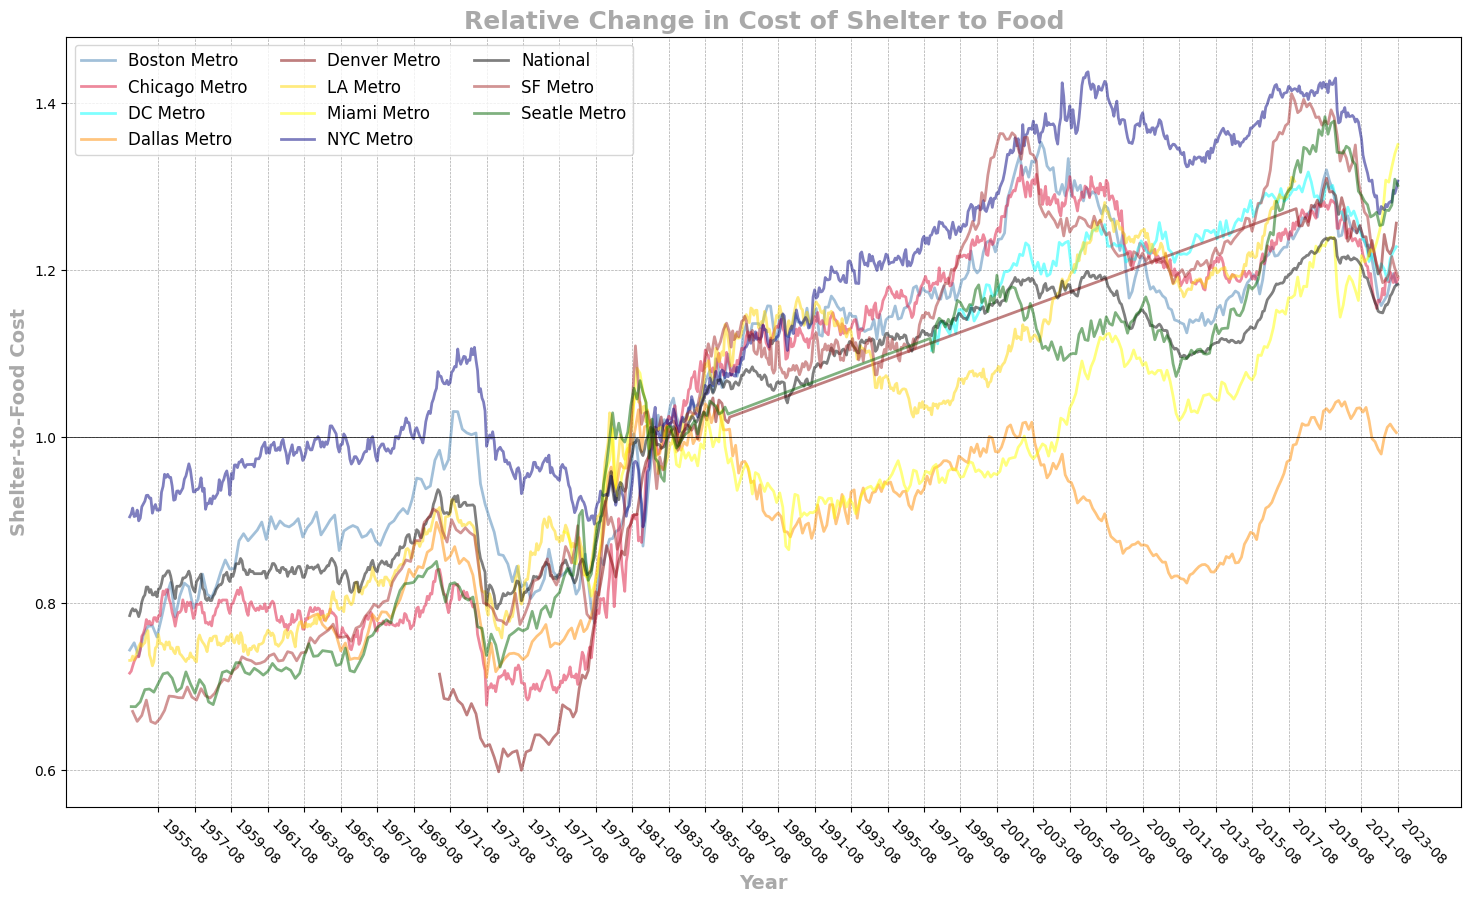

In [44]:
figure_size = (18.0, 10.0)
colors_dict = {
  "National": "black",
  "NYC": "navy",
  "Boston": "steelblue",
  "DC": "cyan",
  "Chicago": "crimson",
  "Dallas": "darkorange",
  "Denver": "maroon",
  "Seatle": "darkgreen",
  "SF": "brown",
  "LA": "gold",
  "Miami": "yellow",
}

fig = plt.figure(figsize=figure_size)
ax = plt.gca()

for metro_name, metro_dict in sorted(grouped_dict.items()):
    color = colors_dict[metro_name.split("_")[0]]
    
    food_df = df_dict[metro_dict["Food"]][["Day", "Value"]]
    shelter_df = df_dict[metro_dict["Shelter"]][["Day", "Value"]]
    df = food_df.merge(right=shelter_df, how="inner", on="Day", 
                       sort=False, suffixes=("_Food", "_Shelter"))

    ls = "-"
    lw = 2.0
    marker = ""
    markersize = 5.0
    alpha = 0.5 
    shelter_to_food = df["Value_Shelter"] / df["Value_Food"]
    ax.plot(df["Day"].to_numpy(), shelter_to_food.to_numpy(),
        ls=ls, lw=lw, marker=marker, markersize=markersize,
        alpha=alpha, color=color,
        label=metro_name.replace("_", " "))

ax.set_title("Relative Change in Cost of Shelter to Food", 
             fontsize=18, fontweight="bold", color="darkgrey")
ax.legend(loc="upper left", ncol=3, fontsize=12)
ax.grid(lw=0.5, ls="--", color="darkgrey")
ax.axhline(y=1.0, linestyle="-", lw=0.5, color="black")
ax.set_axisbelow("True")
ax.set_ylabel("Shelter-to-Food Cost", fontsize=14, 
              fontweight="bold", color="darkgrey")
ax.set_xlabel("Year", fontsize=14, 
              fontweight="bold", color="darkgrey")
#
tick_freq = 24
xtick_labels = df_dict["All"]["DATE"].dt.strftime("%Y-%m").iloc[::tick_freq].to_list()
x_ticks = df_dict["All"]["Day"].iloc[::tick_freq].to_list()
ax.set_xticks(x_ticks)
ax.set_xticklabels(xtick_labels, rotation=-45, ha="left", va="top", color="black", fontsize=10)
# ax.set_yscale("log")

plt.show()